<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Clasificaci%C3%B3n_Estadistica_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

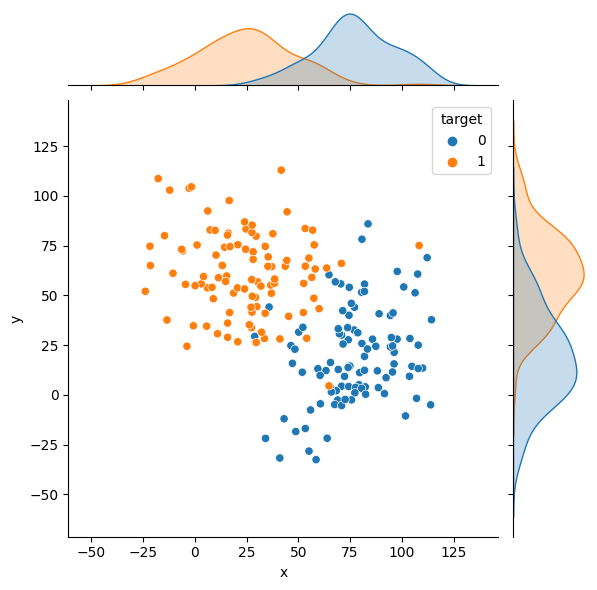

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.graph_objects as go


muestras = 100

mediaX1 = 80
desvioX1 = 20

mediaY1 = 20
desvioY1 = 25

mediaX2 = 20
desvioX2 = 25

mediaY2 = 60
desvioY2 = 20


X1 = pd.Series(np.random.normal(loc=mediaX1, scale=desvioX1, size=muestras))
Y1 = pd.Series(np.random.normal(loc=mediaY1, scale=desvioY1, size=muestras))
Data1 = pd.DataFrame({'color':'red', 'target':0, 'x':X1, 'y':Y1})


X2 = pd.Series(np.random.normal(loc=mediaX2, scale=desvioX2, size=muestras))
Y2 = pd.Series(np.random.normal(loc=mediaY2, scale=desvioY2, size=muestras))
Data2 = pd.DataFrame({'color':'blue', 'target':1, 'x':X2, 'y':Y2})


Dataset_Multivariado = pd.concat([Data1, Data2], ignore_index=True, axis=0)

sns.jointplot(data=Dataset_Multivariado, x="x", y="y", kind="scatter", hue="target")

<Axes: xlabel='x', ylabel='y'>

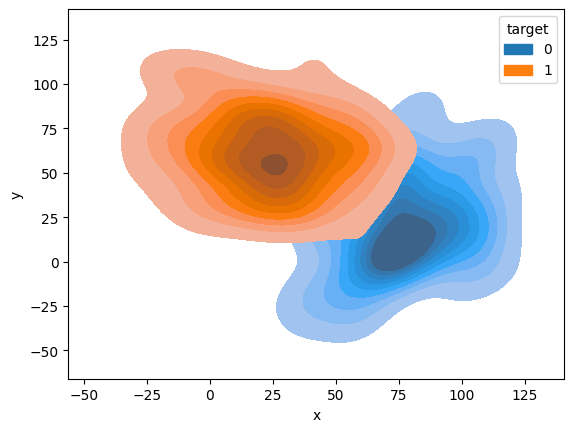

In [3]:
sns.kdeplot(data=Dataset_Multivariado, x= "x", y="y", hue="target", fill= True)

In [4]:
# Calcular el centroide para el grupo con target=0
centroid_0 = Dataset_Multivariado[Dataset_Multivariado['target'] == 0][['x', 'y']].mean()

# Calcular el centroide para el grupo con target=1
centroid_1 = Dataset_Multivariado[Dataset_Multivariado['target'] == 1][['x', 'y']].mean()

print(f'El centroide del conjunto 0: ({round(centroid_0[0],2)},{round(centroid_0[1],2)})')
print(f'El centroide del conjunto 1: ({round(centroid_1[0],2)},{round(centroid_1[1],2)})')

El centroide del conjunto 0: (77.26,19.72)
El centroide del conjunto 1: (24.49,61.01)


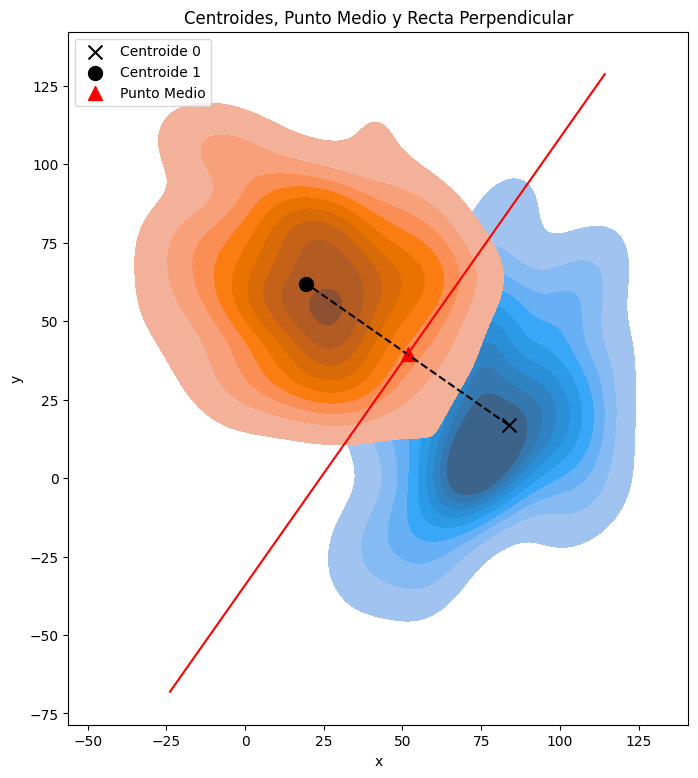

In [5]:
import matplotlib.pyplot as plt

# Datos de los centroides
centroid_0 = (83.75, 16.9)
centroid_1 = (19.46, 62.01)


plt.figure(figsize=(8, 9))
sns.kdeplot(data=Dataset_Multivariado, x= "x", y="y", hue="target", fill= True)
plt.scatter(*centroid_0, color='black', marker='x', s=100, label='Centroide 0')
plt.scatter(*centroid_1, color='black', marker='o', s=100, label='Centroide 1')
plt.plot([centroid_0[0], centroid_1[0]], [centroid_0[1], centroid_1[1]], 'k--')

# Calcular el punto medio
punto_medio = ((centroid_0[0] + centroid_1[0]) / 2, (centroid_0[1] + centroid_1[1]) / 2)
plt.scatter(punto_medio[0], punto_medio[1], color='red', marker='^', s=100, label='Punto Medio')

# 3º) Recta perpendicular
pendiente = (centroid_1[1] - centroid_0[1]) / (centroid_1[0] - centroid_0[0])
pendiente_perpendicular = -1 / pendiente

# Usando y = mx + b, donde m es la pendiente y b es la ordenada al origen
b = punto_medio[1] - pendiente_perpendicular * punto_medio[0]

# Puntos extremos para la recta perpendicular
x_vals = np.array([Dataset_Multivariado['x'].min(), Dataset_Multivariado['x'].max()])
y_vals = pendiente_perpendicular * x_vals + b
plt.plot(x_vals, y_vals, 'red')

plt.legend()
plt.title('Centroides, Punto Medio y Recta Perpendicular')
plt.show()

In [1]:
def predictor_multivariado(row, perpendicular_slope, b):
    x_new, y_new = row['x'], row['y']
    y_expected = perpendicular_slope * x_new + b
    if y_new > y_expected:
        return 1
    else:
        return 0


Dataset_Multivariado['classification'] = Dataset_Multivariado.apply(predictor_multivariado, args=(perpendicular_slope, b), axis=1)

NameError: ignored